##### Name: LIU,HONGYANG

##### Matric Number: 17201091/1

**Target crawling website:**  https://www.macrotrends.net/2516/wti-crude-oil-prices-10-year-daily-chart

**1.You are required to write code that will crawl the WWW (your familiar domain) of a particular website and collect data from social media or from report or news and so on and to produce dataset.**

In [2]:
import requests
import requests.cookies
import json
import time
import pandas as pd
from bs4 import BeautifulSoup

url='https://www.macrotrends.net/2516/wti-crude-oil-prices-10-year-daily-chart'

headers={
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'
}

res = requests.get(url,headers=headers)


try:

    df = pd.read_html(res.text)
    pan = pd.DataFrame(df[0])
    d={'Year':pan.iloc[:,0],'AverageClosing Price':pan.iloc[:,1],'Year Open':pan.iloc[:,2],'Year High':pan.iloc[:,3],'Year Low':pan.iloc[:,4],'Year Close':pan.iloc[:,5],'Annual% Change':pan.iloc[:,6]}
    df = pd.DataFrame(data=d)
    df.to_csv('oilCrawl.csv')
except:

    print("The url doesn't work!")
df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,$37.74,$61.17,$63.27,$11.26,$27.62,-54.82%
1,2019,$56.99,$46.31,$66.24,$46.31,$61.14,35.42%
2,2018,$65.23,$60.37,$77.41,$44.48,$45.15,-25.32%
3,2017,$50.80,$52.36,$60.46,$42.48,$60.46,12.48%
4,2016,$43.29,$36.81,$54.01,$26.19,$53.75,44.76%


**2.   After that you are required to write code to modify and/or select your the attributes to perform the following tasks:
Data Cleaning
Data Integration 
Data Transformation
Data Reduction
Hint : Make sure that use graph to help you select appropriate attributes to perform the above tasks.**
                                                                                                    

2.1 Data Cleaning

In [6]:
#check missing data
df.isnull().sum().any()

False

In [7]:
#check duplicated data
df.loc[df.duplicated(),:]

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change


In [8]:
#check inconsistent data;
#we can find the type of attributes are inconsistent
df.dtypes

Year                     int64
AverageClosing Price    object
Year Open               object
Year High               object
Year Low                object
Year Close              object
Annual% Change          object
dtype: object

2.2 Data Integration

- we will download another source data from this website: https://datahub.io/core/gdp-us

- Integrate the two kind of sources into one

In [86]:
#download and read another data source
AmericaGdp=pd.read_csv('year_csv.csv')

#check data
AmericaGdp.head()

,date,level-current,level-chained,change-current,change-chained
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


In [87]:
#rename to do data integration; we will add level-current
#,level-chained,change-current,change-chained to priveous data sets.	
AmericaGdp=AmericaGdp.rename(columns={'date':'Year'})
AmericaGdp.head()

,Year,level-current,level-chained,change-current,change-chained
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


2.3 Transformation

In [98]:
#After integration,
#please first integrate the data in Question 4; and then run this part of code!!!
integration.describe()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2001.000000,0.483793,0.548621,1.255172,0.548276,0.523103,8.655172,10927.417241,12371.534483,4.765517,2.531034
std,8.514693,0.288201,0.532579,2.328396,0.288061,0.290346,37.494072,4090.517387,2635.239268,1.996117,1.651645
min,1987.000000,0.050000,0.030000,0.030000,0.020000,0.060000,-53.000000,4870.200000,8132.600000,-2.000000,-2.800000
25%,1994.000000,0.200000,0.170000,0.210000,0.380000,0.210000,-25.000000,7308.800000,9905.400000,3.700000,1.800000
50%,2001.000000,0.480000,0.520000,0.530000,0.510000,0.510000,4.000000,10621.800000,12682.200000,4.900000,2.700000
75%,2008.000000,0.640000,0.710000,0.720000,0.820000,0.770000,30.000000,14477.600000,14783.800000,6.300000,3.800000
max,2015.000000,0.980000,2.960000,9.390000,0.990000,0.960000,112.000000,18120.700000,16471.500000,7.900000,4.700000



**Run the code`integration.describe()`, check the standard deviation, we can find the `level-current` `level-chained` columns have very high standard deviation.**

**we need scale the attributes of the two columns in Question 5**

![](https://tva1.sinaimg.cn/large/007S8ZIlgy1gete8y5i7lj31ds08eabj.jpg)

2.4 Data Reduction

In [116]:
# check the columns
integration.columns

Index(['Year', 'AverageClosing Price', 'Year Open', 'Year High', 'Year Low',
       'Year Close', 'Annual% Change', 'level-current', 'level-chained',
       'change-current', 'change-chained'],
      dtype='object')

In [118]:
#fautures:
features=['level-current','level-chained','change-current','change-chained']

#targets:
targets=['Year Close']

we will use PCA to do reduce columns and dimensionality in Question 6

**3.You are required to write data cleaning code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
Importing required libraries
Loading Data
Before data cleaning, plot your result (attribute)
Data cleaning
After data cleaning, plot your result (attribute)**


In [100]:
# import libraries
import pandas as pd

before data cleaning

In [12]:
df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,$37.74,$61.17,$63.27,$11.26,$27.62,-54.82%
1,2019,$56.99,$46.31,$66.24,$46.31,$61.14,35.42%
2,2018,$65.23,$60.37,$77.41,$44.48,$45.15,-25.32%
3,2017,$50.80,$52.36,$60.46,$42.48,$60.46,12.48%
4,2016,$43.29,$36.81,$54.01,$26.19,$53.75,44.76%


data cleaning

In [26]:
# In quesion2, we note that the data is inconsistent because we need remove symbol'$' and '%' 
df.loc[:,['AverageClosing Price','Annual% Change']].head()

,AverageClosing Price,Annual% Change
0,$37.74,-54.82
1,$56.99,35.42
2,$65.23,-25.32
3,$50.80,12.48
4,$43.29,44.76


In [29]:
#Removing the symbol '%' and '$'
df['Annual% Change'] = list(map(lambda x: x[:-1], df['Annual% Change'].values))
df['AverageClosing Price'] = list(map(lambda x: x[1:], df['AverageClosing Price'].values))
df['Year Open'] = list(map(lambda x: x[1:], df['Year Open'].values))
df['Year High'] = list(map(lambda x: x[1:], df['Year High'].values))
df['Year Low'] = list(map(lambda x: x[1:], df['Year Low'].values))
df['Year Close'] = list(map(lambda x: x[1:], df['Year Close'].values))


df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,.74,.17,.27,.26,.62,-54
1,2019,.99,.31,.24,.31,.14,35
2,2018,.23,.37,.41,.48,.15,-25
3,2017,.80,.36,.46,.48,.46,12
4,2016,.29,.81,.01,.19,.75,44


In [21]:
# then, we need solve data inconsistent problem
df.dtypes

Year                     int64
AverageClosing Price    object
Year Open               object
Year High               object
Year Low                object
Year Close              object
Annual% Change          object
dtype: object

In [31]:
#after the '%' and '$' symbol has been removed
# We note that column values for columns have data types of string
# so we need to convert these to numeric data as follows:
df['Annual% Change'] = [float(x) for x in df['Annual% Change'].values]
df['AverageClosing Price'] = [float(x) for x in df['AverageClosing Price'].values]
df['Year Open'] = [float(x) for x in df['Year Open'].values]
df['Year High'] = [float(x) for x in df['Year High'].values]
df['Year Low'] = [float(x) for x in df['Year Low'].values]
df['Year Close'] = [float(x) for x in df['Year Close'].values]

df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,0.74,0.17,0.27,0.26,0.62,-54.0
1,2019,0.99,0.31,0.24,0.31,0.14,35.0
2,2018,0.23,0.37,0.41,0.48,0.15,-25.0
3,2017,0.80,0.36,0.46,0.48,0.46,12.0
4,2016,0.29,0.81,0.01,0.19,0.75,44.0


after data cleaning

In [34]:
#check the data
df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,0.74,0.17,0.27,0.26,0.62,-54.0
1,2019,0.99,0.31,0.24,0.31,0.14,35.0
2,2018,0.23,0.37,0.41,0.48,0.15,-25.0
3,2017,0.80,0.36,0.46,0.48,0.46,12.0
4,2016,0.29,0.81,0.01,0.19,0.75,44.0


In [33]:
#check the data type
df.dtypes

Year                      int64
AverageClosing Price    float64
Year Open               float64
Year High               float64
Year Low                float64
Year Close              float64
Annual% Change          float64
dtype: object

**4.   You are required to write data integration code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps: 
Importing required libraries
Loading Data
Before data cleaning, plot your result (attribute)
Data cleaning
After data cleaning, plot your result (attribute)**

In [99]:
# import libraries
import pandas as pd

before integraion

In [85]:
df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,0.74,0.17,0.27,0.26,0.62,-54.0
1,2019,0.99,0.31,0.24,0.31,0.14,35.0
2,2018,0.23,0.37,0.41,0.48,0.15,-25.0
3,2017,0.80,0.36,0.46,0.48,0.46,12.0
4,2016,0.29,0.81,0.01,0.19,0.75,44.0


integration

In [88]:
#According to quesiont2.2,we will merge df sets and American GDP sets

#oilPrice
df.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change
0,2020,0.74,0.17,0.27,0.26,0.62,-54.0
1,2019,0.99,0.31,0.24,0.31,0.14,35.0
2,2018,0.23,0.37,0.41,0.48,0.15,-25.0
3,2017,0.80,0.36,0.46,0.48,0.46,12.0
4,2016,0.29,0.81,0.01,0.19,0.75,44.0


In [90]:
#American GDP
AmericaGdp.head()

,Year,level-current,level-chained,change-current,change-chained
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


In [92]:
#merge two data sources: oldPrice and American GDP, using Year value
integration=pd.merge(df,AmericaGdp,on='Year')

after integration

In [93]:
integration.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
0,2015,0.66,0.72,0.36,0.55,0.13,-30.0,18120.7,16471.5,2.8,1.5
1,2014,0.17,0.14,7.95,0.45,0.45,-45.0,17427.6,16013.3,4.0,2.9
2,2013,0.98,0.14,0.62,0.65,0.17,6.0,16691.5,15612.2,4.4,2.6
3,2012,0.05,2.96,9.39,0.72,0.83,-7.0,16155.3,15354.6,3.3,1.7
4,2011,0.88,0.59,3.39,0.40,0.83,8.0,15517.9,15020.6,4.1,2.2


**5.   You are required to write data transformation code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
Importing required libraries
Loading Data
Before data transformation,  plot your result (attributes)
Data transformation
After data transformation, plot your result (attributes)
                                  Hint : Normalization, Aggregation and Generalization**


In [107]:
# import libraries
import pandas as pd
from sklearn import preprocessing

before transformation

In [103]:
#check the value
integration.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
0,2015,0.66,0.72,0.36,0.55,0.13,-30.0,18120.7,16471.5,2.8,1.5
1,2014,0.17,0.14,7.95,0.45,0.45,-45.0,17427.6,16013.3,4.0,2.9
2,2013,0.98,0.14,0.62,0.65,0.17,6.0,16691.5,15612.2,4.4,2.6
3,2012,0.05,2.96,9.39,0.72,0.83,-7.0,16155.3,15354.6,3.3,1.7
4,2011,0.88,0.59,3.39,0.40,0.83,8.0,15517.9,15020.6,4.1,2.2


In [102]:
#check the specific measures:
integration.describe()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2001.000000,0.483793,0.548621,1.255172,0.548276,0.523103,8.655172,10927.417241,12371.534483,4.765517,2.531034
std,8.514693,0.288201,0.532579,2.328396,0.288061,0.290346,37.494072,4090.517387,2635.239268,1.996117,1.651645
min,1987.000000,0.050000,0.030000,0.030000,0.020000,0.060000,-53.000000,4870.200000,8132.600000,-2.000000,-2.800000
25%,1994.000000,0.200000,0.170000,0.210000,0.380000,0.210000,-25.000000,7308.800000,9905.400000,3.700000,1.800000
50%,2001.000000,0.480000,0.520000,0.530000,0.510000,0.510000,4.000000,10621.800000,12682.200000,4.900000,2.700000
75%,2008.000000,0.640000,0.710000,0.720000,0.820000,0.770000,30.000000,14477.600000,14783.800000,6.300000,3.800000
max,2015.000000,0.980000,2.960000,9.390000,0.990000,0.960000,112.000000,18120.700000,16471.500000,7.900000,4.700000


data transformation

In [108]:
names = integration.columns
scaler = preprocessing.StandardScaler()
after_transformation=scaler.fit_transform(integration)
after_transformation = pd.DataFrame(integration,columns=names)


,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
0,2015,0.66,0.72,0.36,0.55,0.13,-30.0,18120.7,16471.5,2.8,1.5
1,2014,0.17,0.14,7.95,0.45,0.45,-45.0,17427.6,16013.3,4.0,2.9
2,2013,0.98,0.14,0.62,0.65,0.17,6.0,16691.5,15612.2,4.4,2.6
3,2012,0.05,2.96,9.39,0.72,0.83,-7.0,16155.3,15354.6,3.3,1.7
4,2011,0.88,0.59,3.39,0.40,0.83,8.0,15517.9,15020.6,4.1,2.2


after transformation

In [111]:
#check the value
after_transformation.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
0,2015,0.66,0.72,0.36,0.55,0.13,-30.0,18120.7,16471.5,2.8,1.5
1,2014,0.17,0.14,7.95,0.45,0.45,-45.0,17427.6,16013.3,4.0,2.9
2,2013,0.98,0.14,0.62,0.65,0.17,6.0,16691.5,15612.2,4.4,2.6
3,2012,0.05,2.96,9.39,0.72,0.83,-7.0,16155.3,15354.6,3.3,1.7
4,2011,0.88,0.59,3.39,0.40,0.83,8.0,15517.9,15020.6,4.1,2.2


In [112]:
#check the specific measures:
#we can find the attributes have been scaled 
after_transformation.describe()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2001.000000,0.483793,0.548621,1.255172,0.548276,0.523103,8.655172,10927.417241,12371.534483,4.765517,2.531034
std,8.514693,0.288201,0.532579,2.328396,0.288061,0.290346,37.494072,4090.517387,2635.239268,1.996117,1.651645
min,1987.000000,0.050000,0.030000,0.030000,0.020000,0.060000,-53.000000,4870.200000,8132.600000,-2.000000,-2.800000
25%,1994.000000,0.200000,0.170000,0.210000,0.380000,0.210000,-25.000000,7308.800000,9905.400000,3.700000,1.800000
50%,2001.000000,0.480000,0.520000,0.530000,0.510000,0.510000,4.000000,10621.800000,12682.200000,4.900000,2.700000
75%,2008.000000,0.640000,0.710000,0.720000,0.820000,0.770000,30.000000,14477.600000,14783.800000,6.300000,3.800000
max,2015.000000,0.980000,2.960000,9.390000,0.990000,0.960000,112.000000,18120.700000,16471.500000,7.900000,4.700000


**6.   You are required to write data reduction code  using the appropriate attribute (Question 2). In order to achieve the task, you are going to cover the following steps:
Importing required libraries
Loading Data
Before data reduction,  plot your result (attributes)
Data reduction
After data reduction, plot your result (attributes)**


In [125]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

before reduction

In [139]:
integration.head()

,Year,AverageClosing Price,Year Open,Year High,Year Low,Year Close,Annual% Change,level-current,level-chained,change-current,change-chained
0,2015,0.66,0.72,0.36,0.55,0.13,-30.0,18120.7,16471.5,2.8,1.5
1,2014,0.17,0.14,7.95,0.45,0.45,-45.0,17427.6,16013.3,4.0,2.9
2,2013,0.98,0.14,0.62,0.65,0.17,6.0,16691.5,15612.2,4.4,2.6
3,2012,0.05,2.96,9.39,0.72,0.83,-7.0,16155.3,15354.6,3.3,1.7
4,2011,0.88,0.59,3.39,0.40,0.83,8.0,15517.9,15020.6,4.1,2.2


data reduction

In [124]:
#fautures:
features=['level-current','level-chained','change-current','change-chained']

#targets:
targets=['Year Close']

# Separating out the features
x = integration.loc[:,features].values
# Separating out the target
y = integration.loc[:,targets].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [126]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [136]:
#the features have been change from four to two 
finalDf = pd.concat([principalDf, df[targets]], axis = 1)


,principal component 1,principal component 2,Year Close
0,2.534063,-0.820211,0.62
1,1.644059,-1.426582,0.14
2,1.450175,-1.239043,0.15
3,1.875149,-0.558608,0.46
4,1.375971,-0.776668,0.75
5,1.533473,-0.359123,0.13
6,1.111926,-0.579698,0.45
7,4.256278,2.509672,0.17
8,2.552601,0.812714,0.83
9,1.091030,-0.441280,0.83


after data reduction

In [138]:
finalDf.head()

,principal component 1,principal component 2,Year Close
0,2.534063,-0.820211,0.62
1,1.644059,-1.426582,0.14
2,1.450175,-1.239043,0.15
3,1.875149,-0.558608,0.46
4,1.375971,-0.776668,0.75


NameError: name 'indicesToKeep' is not defined

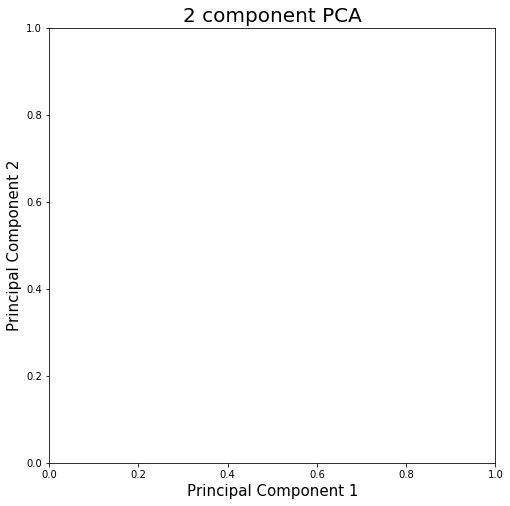

In [142]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

indicesToKeep = finalDf['Year Close']

ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()